# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/airbnb/listings.csv")

C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(48377, 106)

### \#1 Delete unnecessary variabales

In [4]:
drop_cols = ['thumbnail_url',
             'medium_url',
             'xl_picture_url',
             'minimum_nights_avg_ntm',
             'maximum_nights_avg_ntm',
             'listing_url',
             'last_scraped',
             'scrape_id',
             'host_id',
             'minimum_minimum_nights',
             'maximum_minimum_nights',
             'minimum_maximum_nights',
             'maximum_maximum_nights',
             'experiences_offered',
             'picture_url',
             'host_url',
             'host_name',
             'host_since',
             'host_location',
             'host_about',
             'host_thumbnail_url',
             'host_picture_url',
             'host_neighbourhood',
             'street',
             'neighbourhood',
             'city',
             'state',
             'zipcode',
             'market',
             'smart_location',
             'country_code',
             'country',
             'calendar_updated',
             'calendar_last_scraped',
             'first_review',
             'last_review',
             'cleaning_fee',
             'neighbourhood_cleansed'
            ]

In [5]:
data_1 = data.drop(columns=drop_cols)
print(data_1.shape)

(48377, 68)


### \#2 Delete variables which have missing values over 1/4

In [6]:
def missing_statistics(df):

    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['num_missing']
    missing_stats['pct_missing'] = np.round(100 * (missing_stats['num_missing'] / df.shape[0]))
    missing_stats.sort_values(by='num_missing', ascending=False, inplace=True)

    return missing_stats

In [7]:
num_missing = missing_statistics(data_1)
num_missing

,num_missing,pct_missing
host_acceptance_rate,48377,100.0
jurisdiction_names,48366,100.0
license,48356,100.0
square_feet,47999,99.0
monthly_price,43376,90.0
...,...,...
availability_30,0,0.0
availability_60,0,0.0
availability_90,0,0.0
availability_365,0,0.0


In [8]:
cols_to_drop = list(num_missing[num_missing.pct_missing >= 25].index)
data_2 = data_1.drop(cols_to_drop, axis='columns')
print(data_2.shape)

(48377, 52)


### \#3 Convert object data to categorical data

In [9]:
categorical_types = ['host_is_superhost',
                     'host_has_profile_pic',
                     'host_identity_verified',
                     'is_location_exact',
                     'property_type',
                     'room_type',
                     'bed_type',
                     'has_availability',
                     'requires_license',
                     'instant_bookable',
                     'is_business_travel_ready',
                     'cancellation_policy',
                     'require_guest_profile_picture',
                     'require_guest_phone_verification',
                     'neighbourhood_group_cleansed']

In [10]:
data_2[categorical_types].dtypes

host_is_superhost                   object
host_has_profile_pic                object
host_identity_verified              object
is_location_exact                   object
property_type                       object
room_type                           object
bed_type                            object
has_availability                    object
requires_license                    object
instant_bookable                    object
is_business_travel_ready            object
cancellation_policy                 object
require_guest_profile_picture       object
require_guest_phone_verification    object
neighbourhood_group_cleansed        object
dtype: object

In [11]:
data_3 = data_2
data_3[categorical_types] = data_2[categorical_types].apply(lambda x: x.astype('category'),
                                                                                axis='rows')
data_3[categorical_types].dtypes

host_is_superhost                   category
host_has_profile_pic                category
host_identity_verified              category
is_location_exact                   category
property_type                       category
room_type                           category
bed_type                            category
has_availability                    category
requires_license                    category
instant_bookable                    category
is_business_travel_ready            category
cancellation_policy                 category
require_guest_profile_picture       category
require_guest_phone_verification    category
neighbourhood_group_cleansed        category
dtype: object

### \#4 Choose categories for categorical data

host_is_superhost                    2
host_has_profile_pic                 2
host_identity_verified               2
is_location_exact                    2
property_type                       36
room_type                            4
bed_type                             5
has_availability                     1
requires_license                     1
instant_bookable                     2
is_business_travel_ready             1
cancellation_policy                  6
require_guest_profile_picture        2
require_guest_phone_verification     2
neighbourhood_group_cleansed         5
dtype: int64


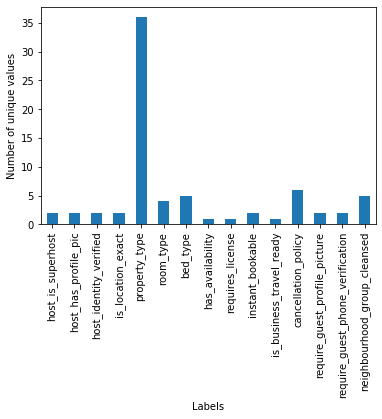

In [12]:
num_unique_values = data_3[categorical_types].apply(pd.Series.nunique, axis='rows')
print(num_unique_values)

# Plot number of unique values for each label
num_unique_values.plot(kind='bar')
# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

In [13]:
data_3.property_type.value_counts()

Apartment                 38144
House                      3944
Townhouse                  1624
Condominium                1512
Loft                       1375
Serviced apartment          437
Guest suite                 382
Hotel                       219
Boutique hotel              214
Other                       115
Bed and breakfast            72
Guesthouse                   57
Resort                       56
Hostel                       54
Bungalow                     37
Villa                        33
Tiny house                   21
Aparthotel                   15
Camper/RV                    13
Boat                         12
Cottage                       7
Tent                          6
Earth house                   5
Houseboat                     5
Cabin                         2
Barn                          2
Bus                           2
Farm stay                     2
Casa particular (Cuba)        2
Cave                          2
Castle                        1
Dome hou

In [14]:
data_4 = data_3[data_3.property_type.isin(['Apartment', 'House', 'Townhouse', 'Condominium', 'Loft'])]

In [15]:
data_4.loc[:, 'property_type'] = data_4.loc[:,'property_type'].cat.remove_unused_categories()

C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
print(data_4.property_type.value_counts())
print(data_4.shape)

Apartment      38144
House           3944
Townhouse       1624
Condominium     1512
Loft            1375
Name: property_type, dtype: int64
(46599, 52)


### \#5 Remove the rows which don't have 'review_scores_ratings' value

In [17]:
missing_df = missing_statistics(data_4)
missing_df

,num_missing,pct_missing
review_scores_location,10108,22.0
review_scores_value,10107,22.0
review_scores_checkin,10104,22.0
review_scores_accuracy,10086,22.0
review_scores_communication,10084,22.0
review_scores_cleanliness,10071,22.0
review_scores_rating,10051,22.0
reviews_per_month,9162,20.0
summary,1977,4.0
description,811,2.0


In [18]:
data_4.loc[data_4.summary.isna().copy(), 'summary'] = ''
data_4.loc[data_4.description.isna().copy(), 'description'] = ''
data_4.loc[data_4.name.isna().copy(), 'name'] = ''

In [19]:
data_5 = data_4[lambda x: x.review_scores_rating.isna() == False]
data_5.shape

(36548, 52)

### \#6 Fill in the missing values

In [20]:
from sklearn.impute import SimpleImputer
category_missing_cols = ['host_has_profile_pic', 'host_identity_verified',
                         'host_is_superhost', 'cancellation_policy']

float_missing_cols = ['bathrooms', 'beds', 'bedrooms',
                      'host_total_listings_count',
                      'host_listings_count',
                      'review_scores_value',
                      'review_scores_accuracy',
                      'review_scores_cleanliness',
                      'review_scores_checkin',
                      'review_scores_communication',
                      'review_scores_location',
                      'reviews_per_month']

In [21]:
def replace(cols, df):


    for col in cols:
        
        """
        Categorical -> 최빈값 사용
        Integer, Float -> 중간값 사용
        """
        
        if type(df[col].dtype) is pd.core.dtypes.dtypes.CategoricalDtype:
            print("{} -> mode".format(col))
            mode_imputer = SimpleImputer(strategy='most_frequent')
            df.loc[:, col] = mode_imputer.fit_transform(df[[col]])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
            print("{} -> median".format(col))
            median_imputer = SimpleImputer(strategy='median')
            df.loc[:, col] = median_imputer.fit_transform(df[[col]])
        else:
            raise ValueError("Invalid value")

    return df

In [22]:
data_6 = replace(float_missing_cols, data_5)
data_6 = replace(category_missing_cols, data_5)

bathrooms -> median
beds -> median
bedrooms -> median
host_total_listings_count -> median
host_listings_count -> median
review_scores_value -> median
review_scores_accuracy -> median
review_scores_cleanliness -> median
review_scores_checkin -> median
review_scores_communication -> median
review_scores_location -> median
reviews_per_month -> median
host_has_profile_pic -> mode


C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

host_identity_verified -> mode
host_is_superhost -> mode


C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


cancellation_policy -> mode


C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
data_6.isna().sum()

id                                              0
name                                            0
summary                                         0
description                                     0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
is_location_exact                               0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0


In [24]:
import re
data_6['price'] = data_6.price.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')
data_6['extra_people'] = data_6.extra_people.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')

C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
data_6.shape

(36548, 52)

### \#7 Create dummy variables

In [26]:
category = pd.get_dummies(data_6[categorical_types])
category.head()

,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_Condominium,...,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
2,1,0,0,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,1,0,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
5,1,0,0,1,1,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
6,1,0,0,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0


In [48]:
category.loc['host_is_superhost_f']

KeyError: 'host_is_superhost_f'

In [27]:
data_7 = pd.concat([data_6, category], axis='columns').drop(categorical_types, axis='columns')
data_7.shape

(36548, 79)

# Regression Modeling

In [28]:
import statsmodels.api as sm
import seaborn as sns

In [29]:
data_7.columns

Index(['id', 'name', 'summary', 'description', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_is_superhost_f', 'host_is_superhost_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t', 'host

### \#8 Multicollinearity assumption check

In [41]:
type(data_7)

pandas.core.frame.DataFrame

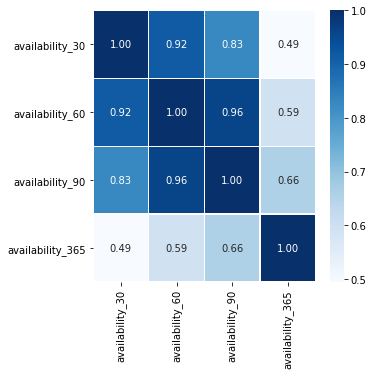

In [48]:
data = data_7[['availability_30', 'availability_60', 'availability_90', 'availability_365']]
plt.figure(figsize=(5,5))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

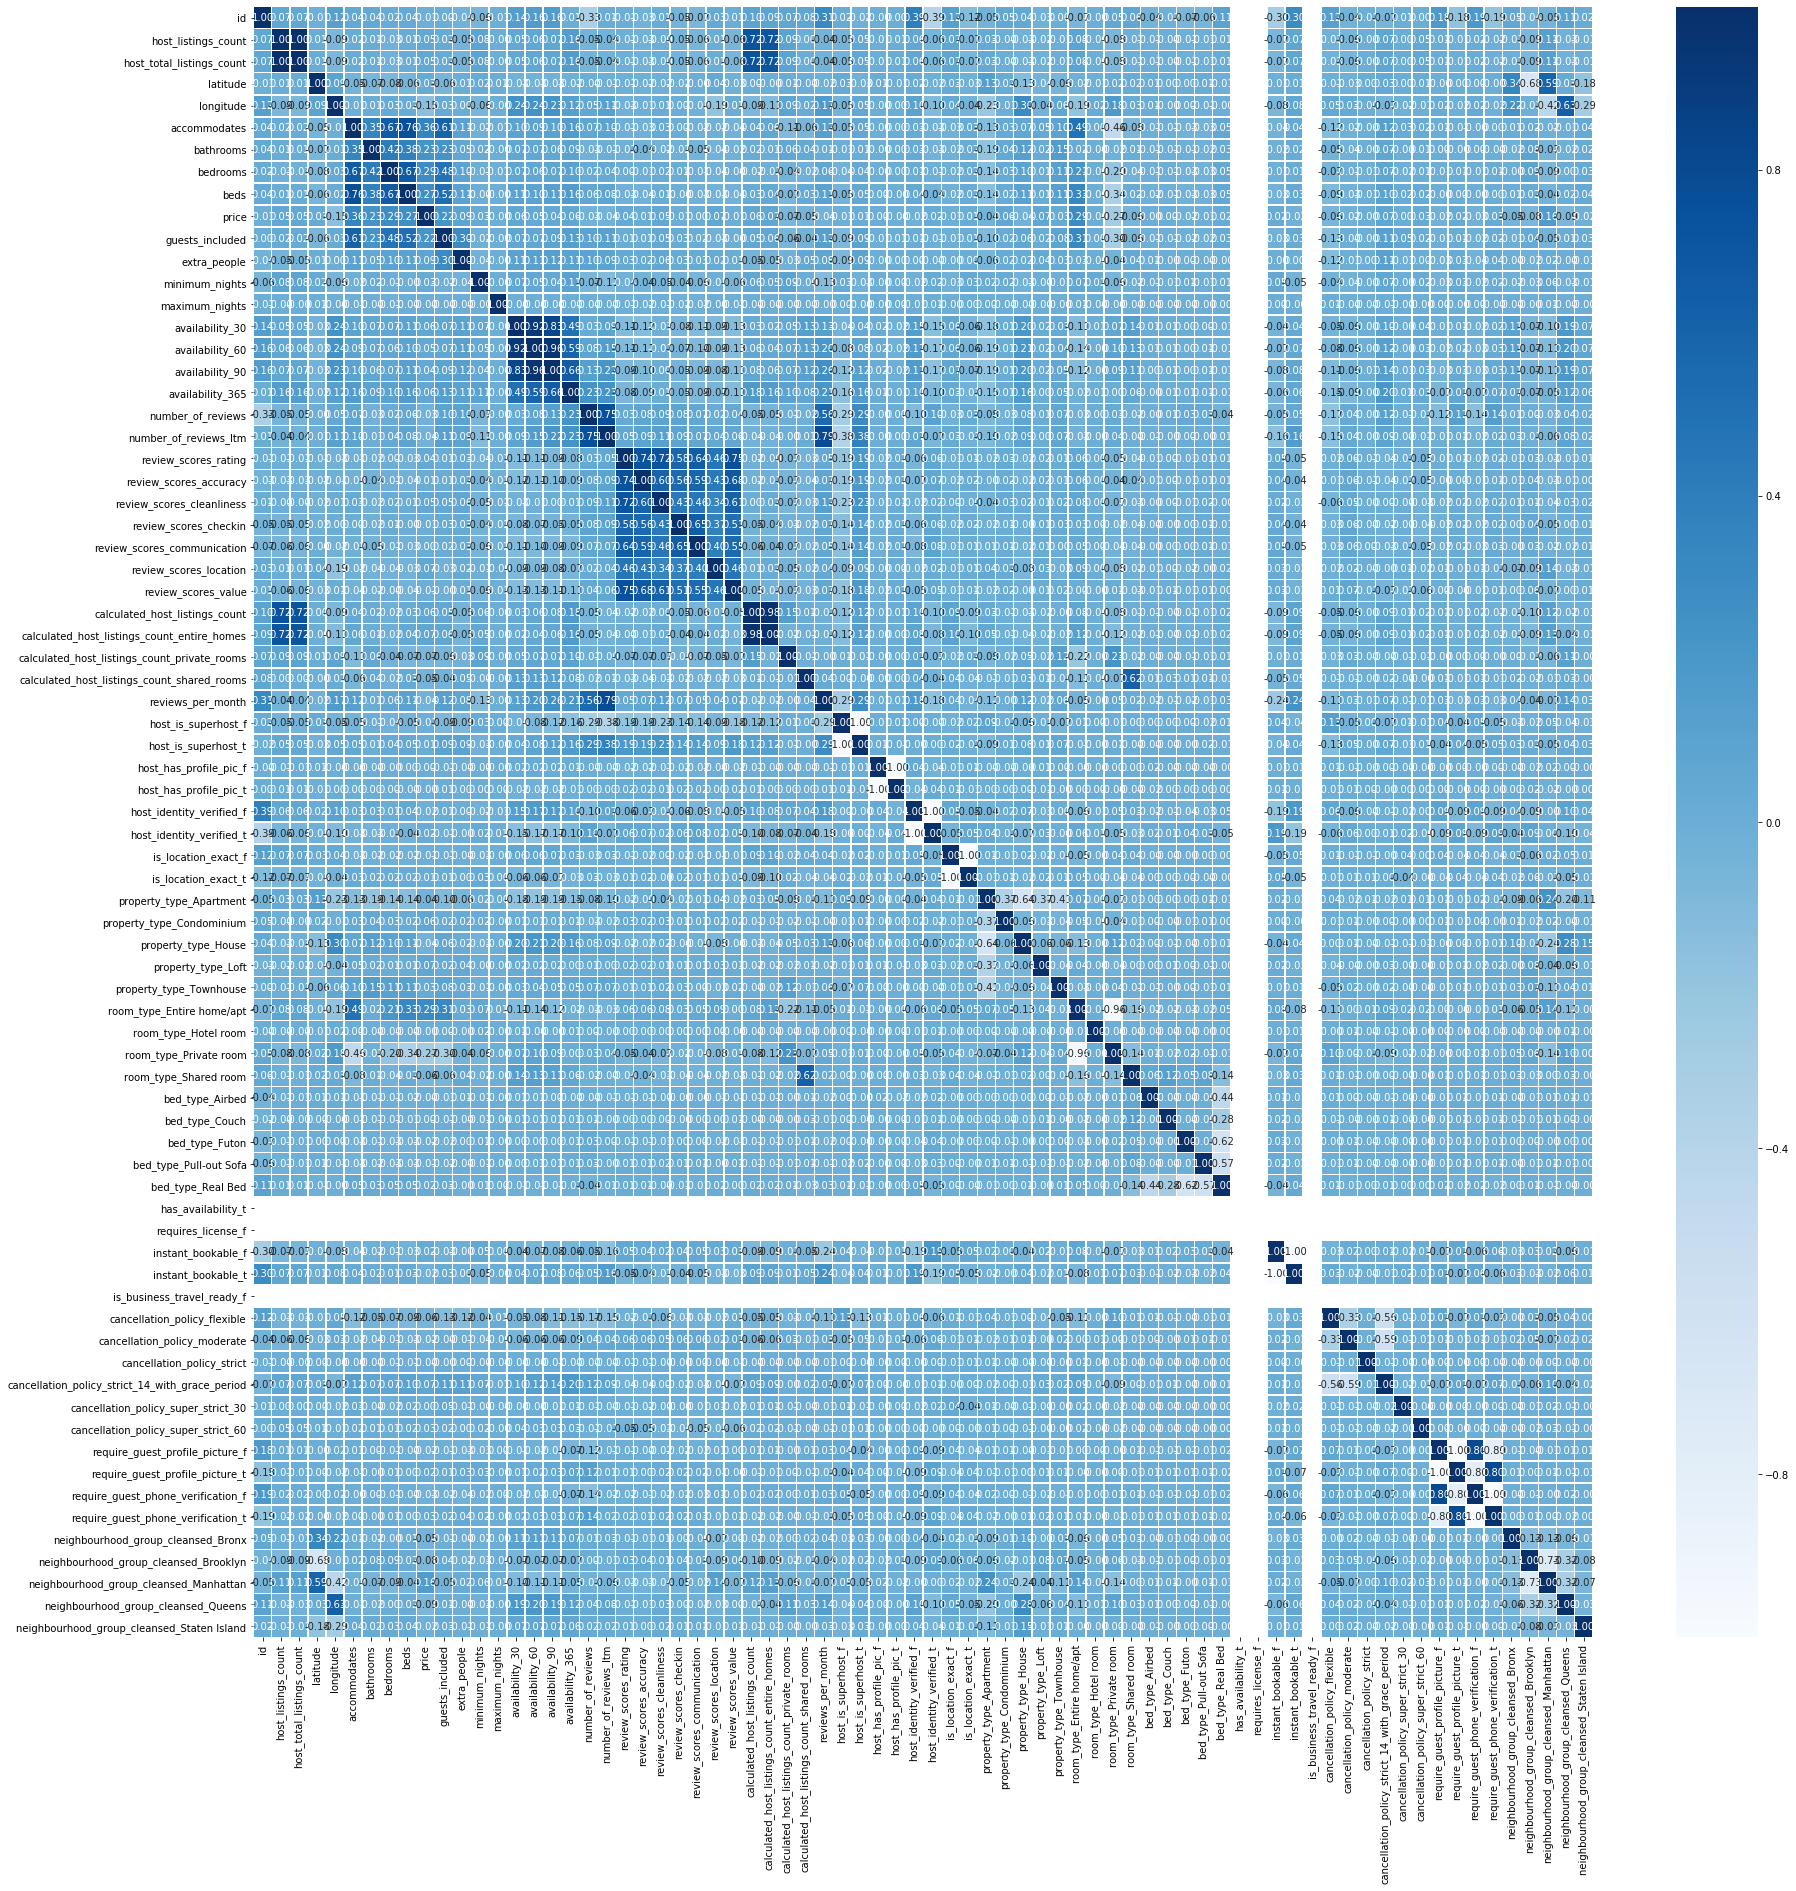

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(data = data_7.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [31]:
data_7['is_business_travel_ready_f']

2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
19       1
22       1
23       1
25       1
26       1
27       1
28       1
29       1
30       1
31       1
32       1
33       1
34       1
36       1
        ..
47911    1
47923    1
47926    1
47927    1
47928    1
47929    1
47952    1
47962    1
47963    1
47965    1
47967    1
47979    1
47980    1
47981    1
47989    1
47993    1
47996    1
48009    1
48036    1
48038    1
48059    1
48065    1
48091    1
48092    1
48094    1
48095    1
48097    1
48144    1
48176    1
48238    1
Name: is_business_travel_ready_f, Length: 36548, dtype: uint8

#### Drop the highly correlated variables

In [32]:
# Variables whose correlation is upper than 0.7

drop_corr = ['has_availability_t','requires_license_f','is_business_travel_ready_f',
           'availability_60', 'availability_90', 'number_of_reviews_ltm',
           'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location', 'review_scores_value',
           'calculated_host_listings_count_entire_homes', 'host_total_listings_count', 
           'calculated_host_listings_count', 'calculated_host_listings_count_shared_rooms',
           'calculated_host_listings_count_private_rooms', 'host_verifications', 'amenities' ]

# Variables which are not necessary to the model
drop_noneed = ['id', 'latitude', 'longitude', 'name', 'summary', 'description']
drop_col = drop_corr + drop_noneed

data_8 = data_7.drop(columns=drop_col)
data_8.shape

(36548, 54)

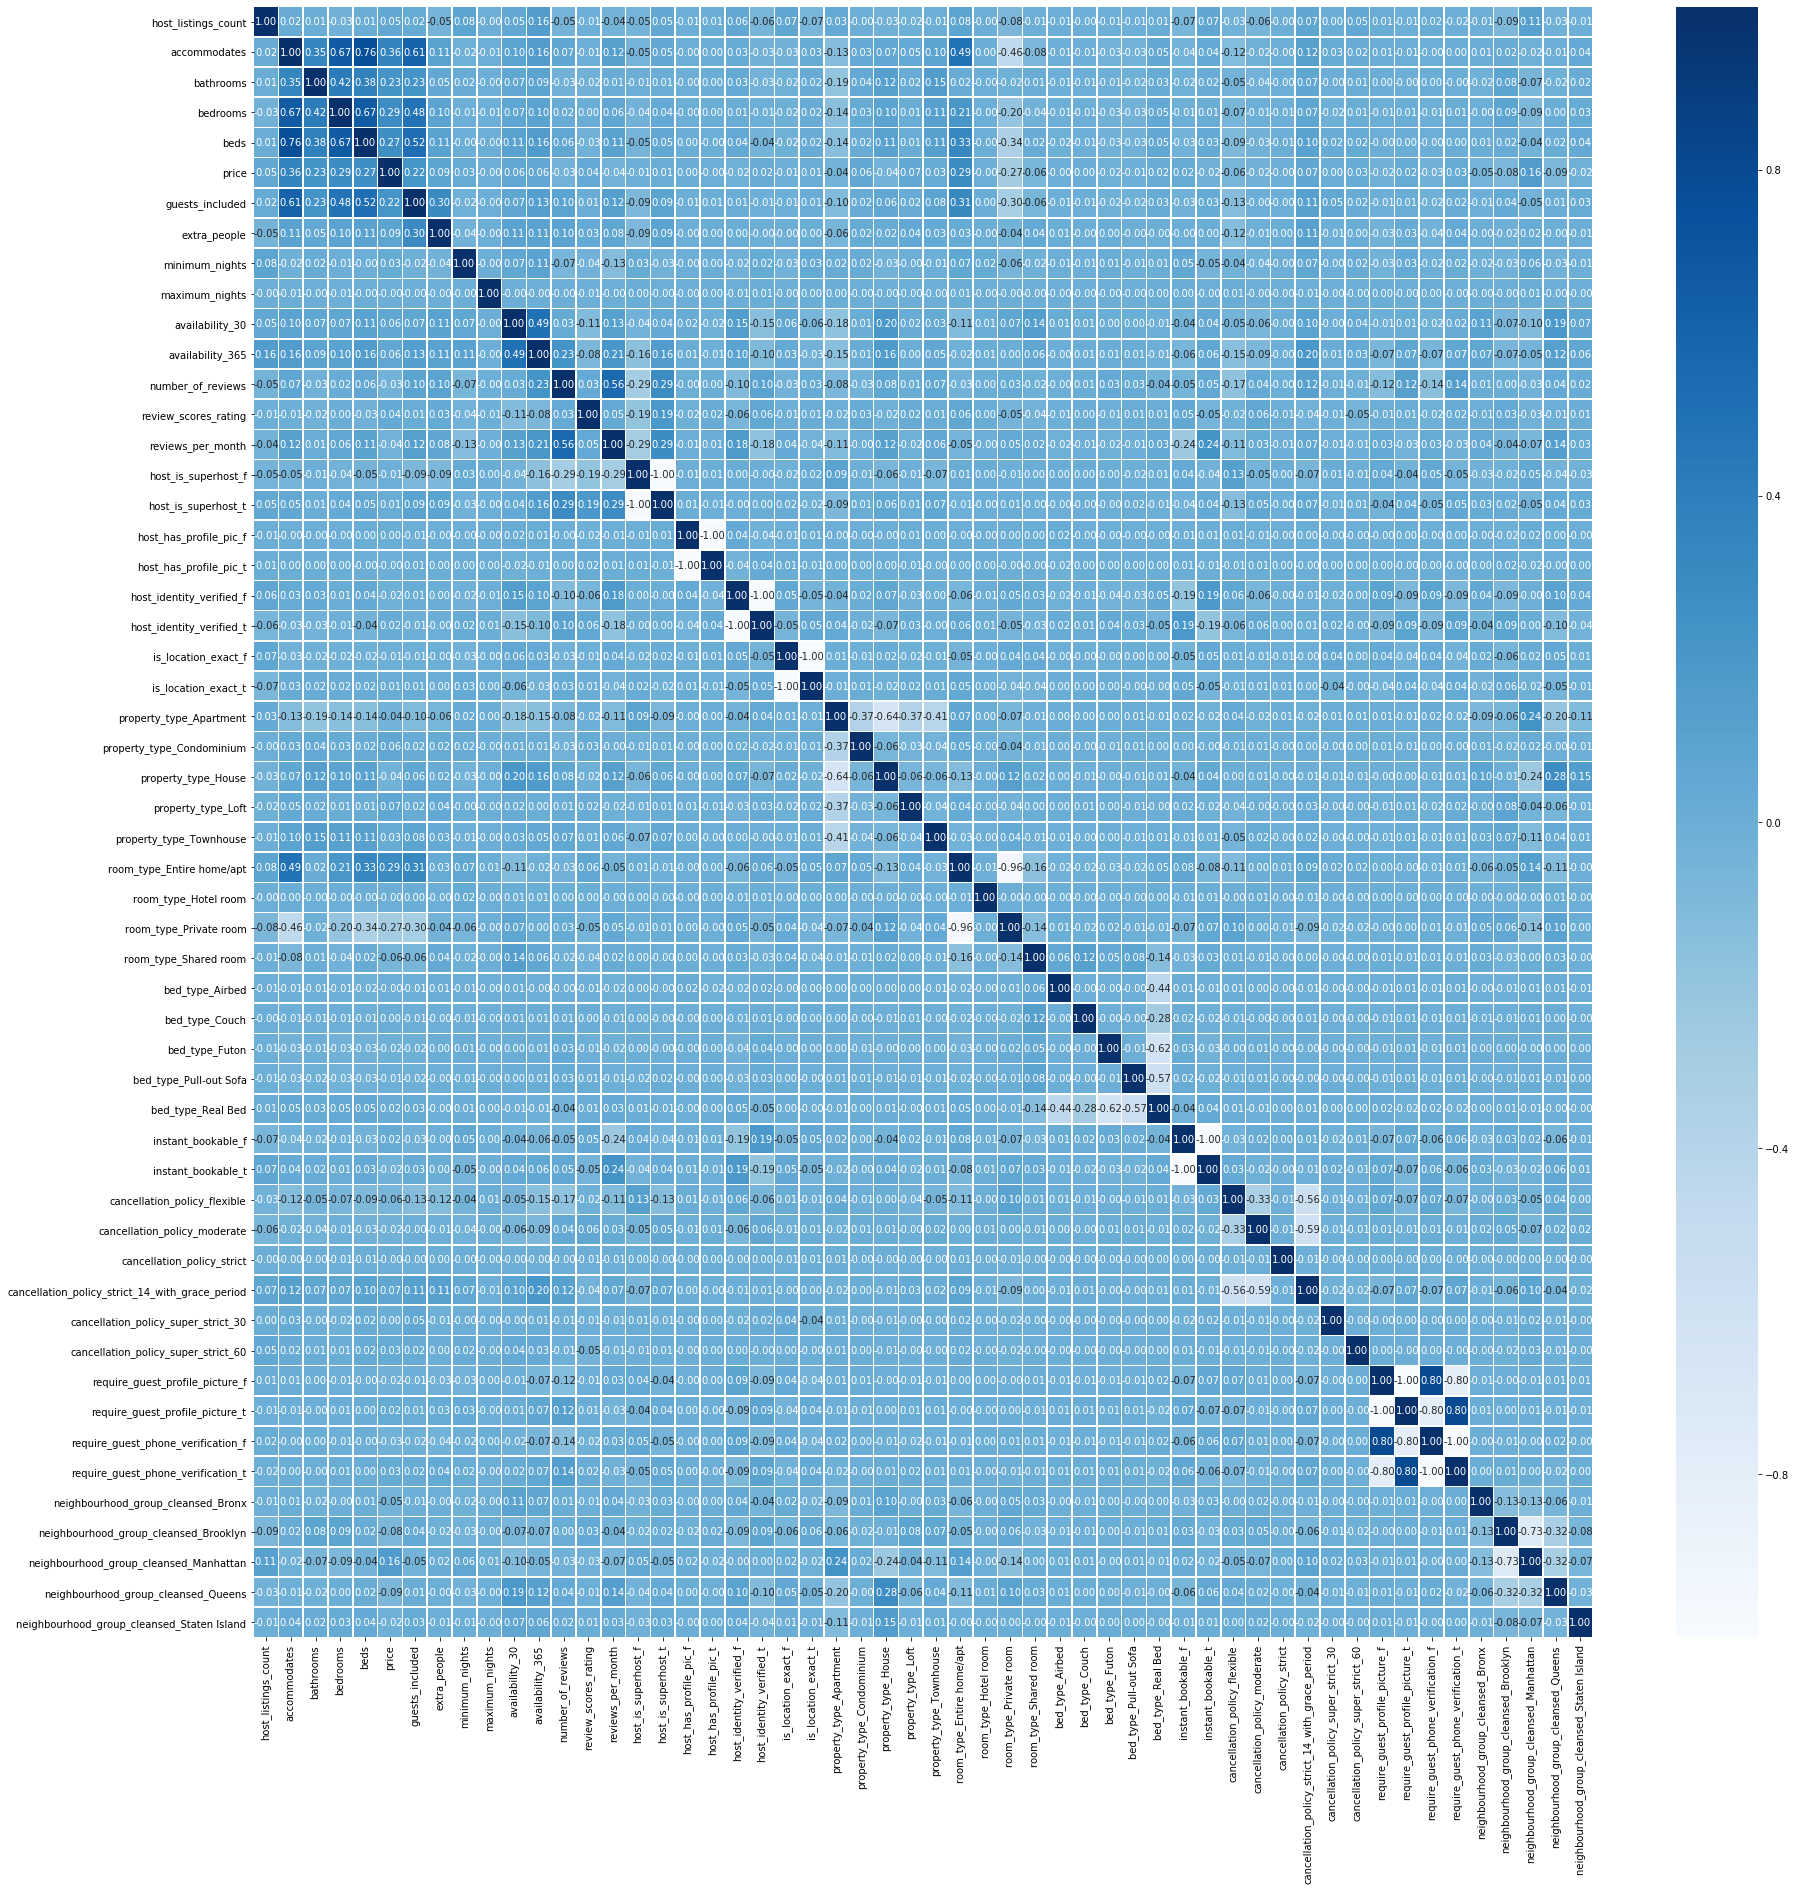

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(data = data_8.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

### \#9 VIF check

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x_data = data_8.drop(columns='review_scores_rating')
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.089788e+00,host_listings_count
1,3.689700e+00,accommodates
2,1.338638e+00,bathrooms
3,2.234835e+00,bedrooms
4,2.776293e+00,beds
5,1.268252e+00,price
6,1.806863e+00,guests_included
7,1.159765e+00,extra_people
8,1.060248e+00,minimum_nights
9,1.000324e+00,maximum_nights


In [35]:
# Drop the last component of dummy variables
drop_last_dummy = ['host_is_superhost_f', 
                   'host_has_profile_pic_f', 
                   'host_identity_verified_f', 
                   'is_location_exact_f',
                   'instant_bookable_f', 
                   'require_guest_profile_picture_f', 
                   'require_guest_phone_verification_f', 
                   'bed_type_Real Bed', 
                   'property_type_Townhouse', 
                   'cancellation_policy_strict_14_with_grace_period',
                   'room_type_Shared room', 
                   'neighbourhood_group_cleansed_Staten Island']


# Drop the variables which have higher VIF value than 10
drop_vif = ['room_type_Private room', 'host_has_profile_pic_t', 
            'accommodates', 'property_type_Apartment',
            'bathrooms', 'beds']

"""
property_type_Apartment: Bathroom과 높은 상관
bathrooms, beds: bedrooms와 높은 상관
accomodates: room_type과 높은 상관
host_has_profile_pic_t: host_verification과 높은 상관
"""

droplist = drop_last_dummy + drop_vif
data_9 = data_8.drop(columns=droplist)
data_9.shape

(36548, 36)

In [36]:
vif = pd.DataFrame()
x_data = data_9.drop(columns='review_scores_rating')
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,1.111309,host_listings_count
1,4.950344,bedrooms
2,1.829565,price
3,4.269131,guests_included
4,1.624026,extra_people
5,1.168317,minimum_nights
6,1.000314,maximum_nights
7,2.007965,availability_30
8,2.710935,availability_365
9,2.377044,number_of_reviews


### OLS #1

In [37]:
x_data = data_9.drop(columns='review_scores_rating')
y_data = data_9['review_scores_rating']
x_data = sm.add_constant(x_data)
reg = sm.OLS(y_data, x_data)
fit = reg.fit()
print(fit.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.074
Model:                              OLS   Adj. R-squared:                  0.073
Method:                   Least Squares   F-statistic:                     83.57
Date:                  Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                          14:01:11   Log-Likelihood:            -1.2871e+05
No. Observations:                 36548   AIC:                         2.575e+05
Df Residuals:                     36512   BIC:                         2.578e+05
Df Model:                            35                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### \#10 Drop the high-P variables

In [38]:
# Drop the variables which have P-value in condition of 95% restriction

droplist = ['host_listings_count', 'guests_included', 'is_location_exact_t', 'room_type_Hotel room',
            'bed_type_Couch', 'cancellation_policy_strict', 'require_guest_profile_picture_t',
            'cancellation_policy_super_strict_30', 'property_type_House',
            'bed_type_Pull-out Sofa', 'neighbourhood_group_cleansed_Bronx',
            'neighbourhood_group_cleansed_Queens']

data_10 = data_9.drop(columns=droplist)

### OLS #2

In [39]:
x_data = data_10.drop(columns='review_scores_rating')
y_data = data_10['review_scores_rating']
x_data = sm.add_constant(x_data)
reg = sm.OLS(y_data, x_data)
fit2 = reg.fit()
print(fit2.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.073
Model:                              OLS   Adj. R-squared:                  0.073
Method:                   Least Squares   F-statistic:                     125.9
Date:                  Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                          14:01:11   Log-Likelihood:            -1.2873e+05
No. Observations:                 36548   AIC:                         2.575e+05
Df Residuals:                     36524   BIC:                         2.577e+05
Df Model:                            23                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

### \#11 Data normalization (Range: -1~1)

In [40]:
# Normalize data to -1 ~ 1 to compare the effect of each variable on the ratings

from sklearn import preprocessing
x = data_10.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_11 = pd.DataFrame(x_scaled)
data_11.columns = data_10.columns
data_11.head()

,bedrooms,price,extra_people,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,...,room_type_Entire home/apt,bed_type_Airbed,bed_type_Futon,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_super_strict_60,require_guest_phone_verification_t,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan
0,0.047619,0.0080,0.066667,0.007206,5.541369e-08,0.000000,0.000000,0.013761,0.9125,0.004410,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.047619,0.0200,0.333333,0.001601,9.313226e-09,0.100000,0.035616,0.114679,0.8625,0.028417,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.047619,0.0060,0.100000,0.035228,3.394671e-07,0.000000,0.000000,0.074924,0.8750,0.018618,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.047619,0.0079,0.040000,0.000801,6.053597e-09,0.033333,0.673973,0.677370,0.7875,0.171485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.047619,0.0079,0.000000,0.000801,6.053597e-09,0.000000,0.000000,0.180428,0.9750,0.047036,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### OLS #3

In [41]:
x_data = data_11.drop(columns='review_scores_rating')
y_data = data_11['review_scores_rating']
x_data = sm.add_constant(x_data)
reg = sm.OLS(y_data, x_data)
fit3 = reg.fit()
print(fit3.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.073
Model:                              OLS   Adj. R-squared:                  0.073
Method:                   Least Squares   F-statistic:                     125.9
Date:                  Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                          14:01:12   Log-Likelihood:                 31428.
No. Observations:                 36548   AIC:                        -6.281e+04
Df Residuals:                     36524   BIC:                        -6.260e+04
Df Model:                            23                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


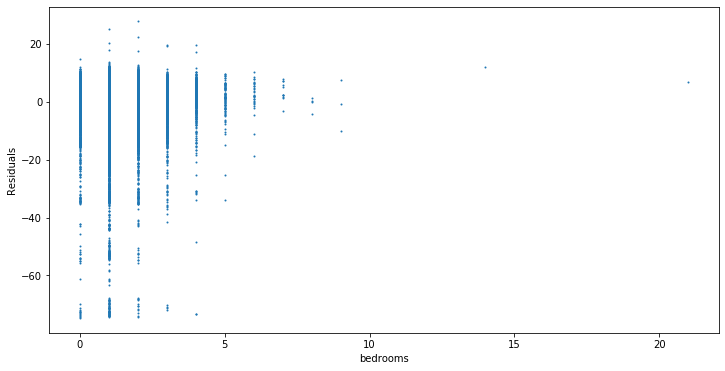

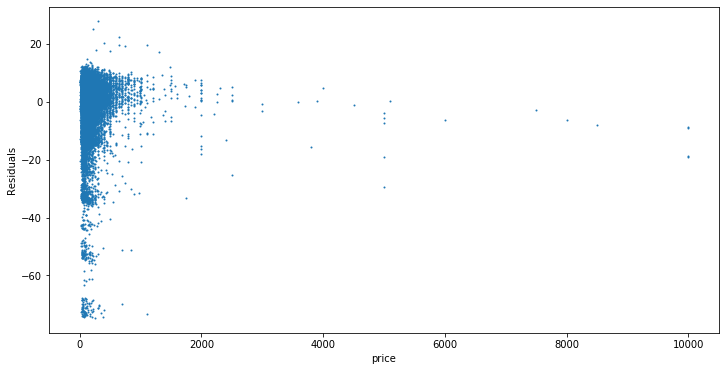

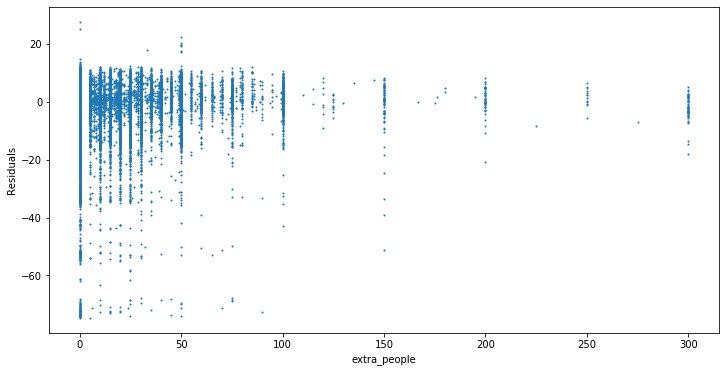

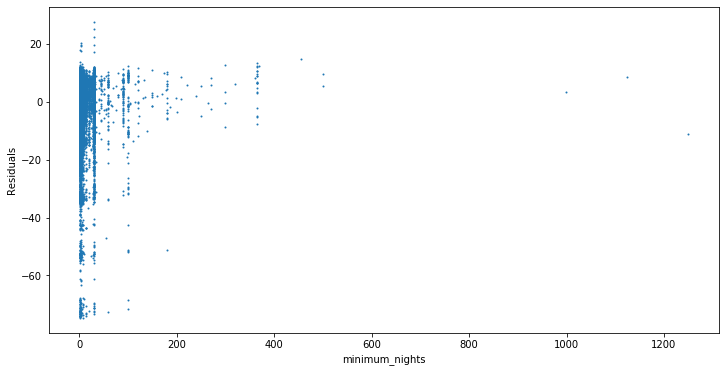

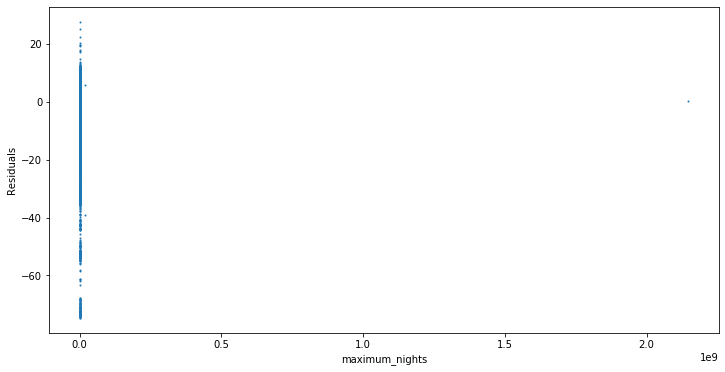

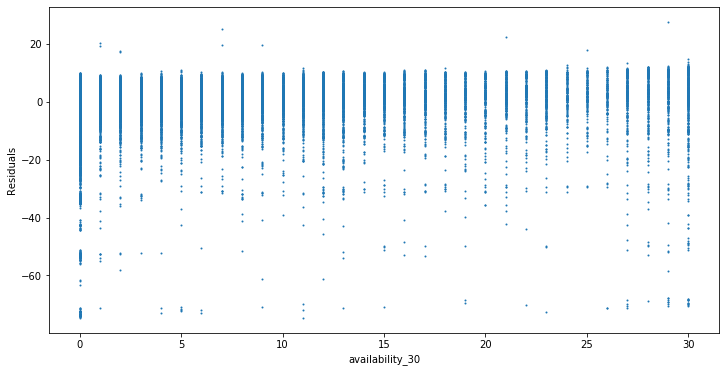

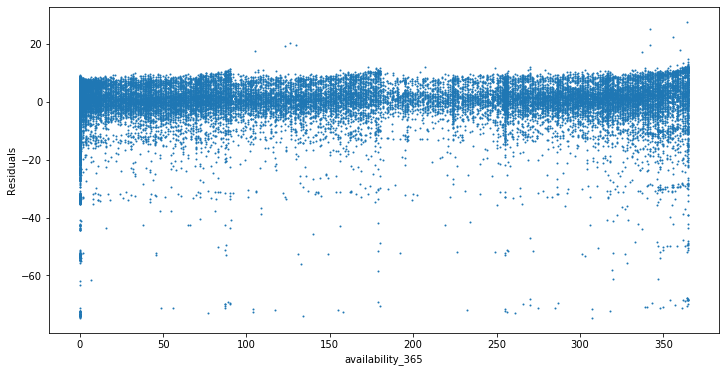

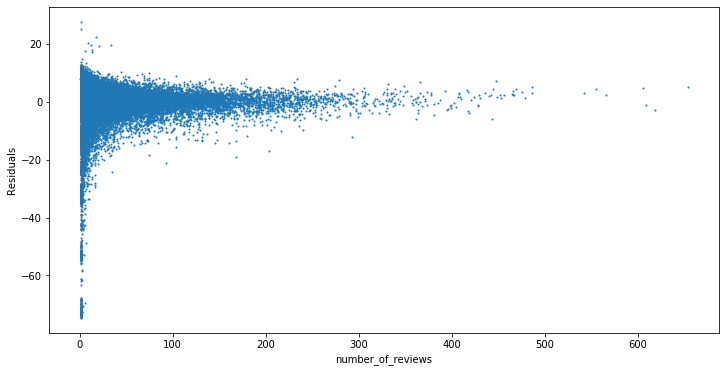

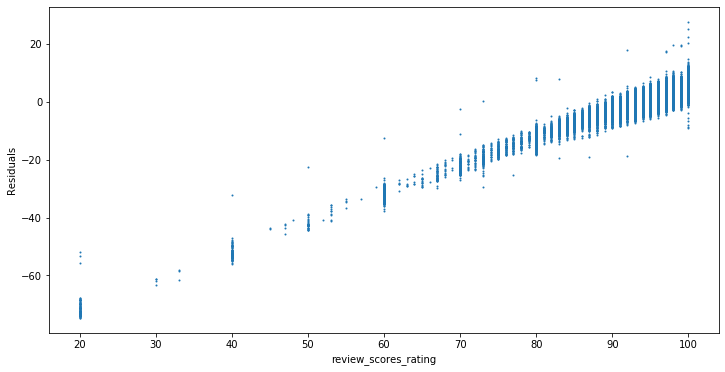

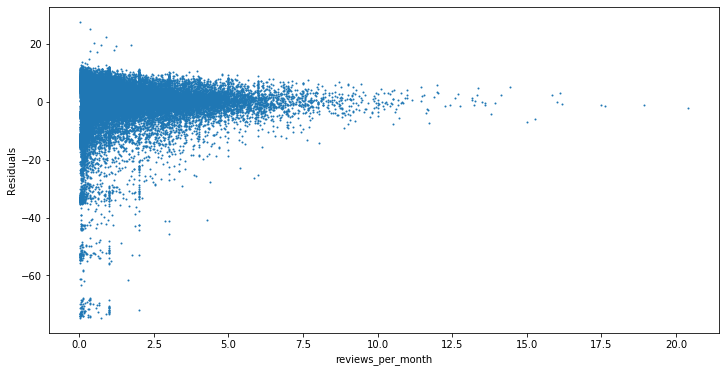

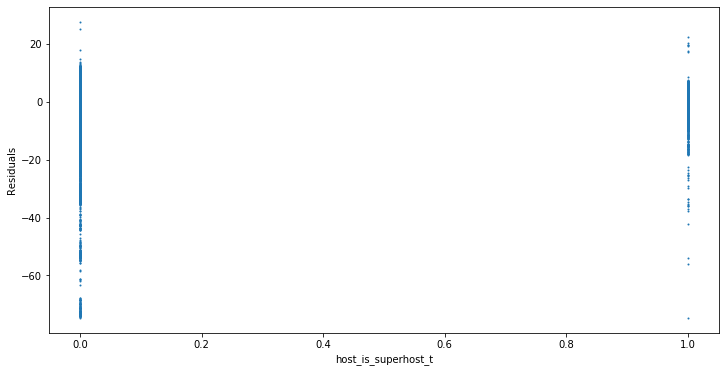

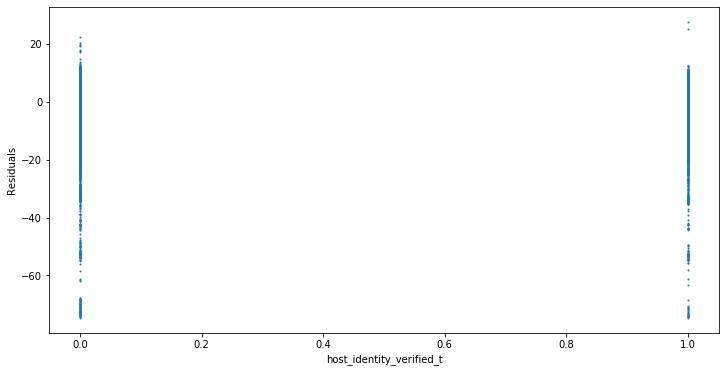

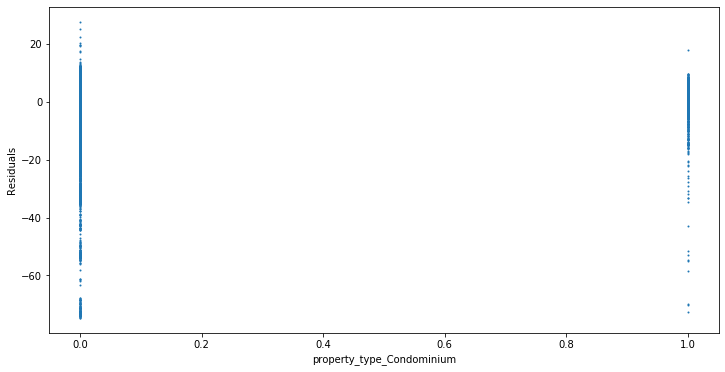

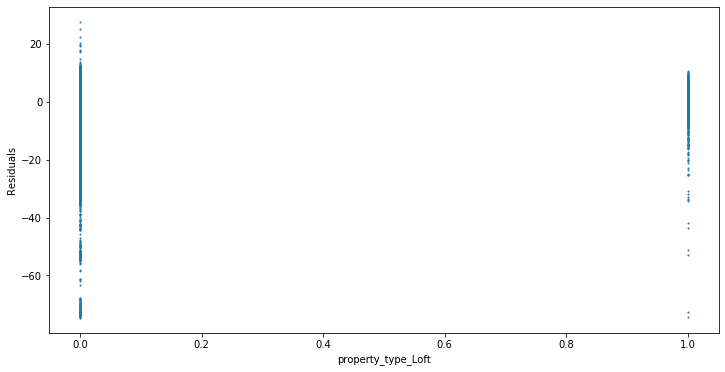

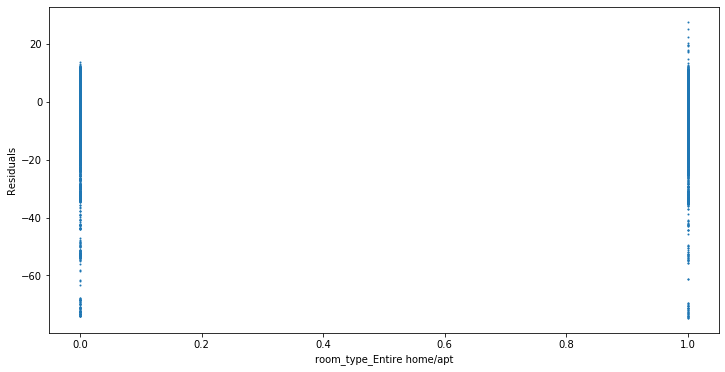

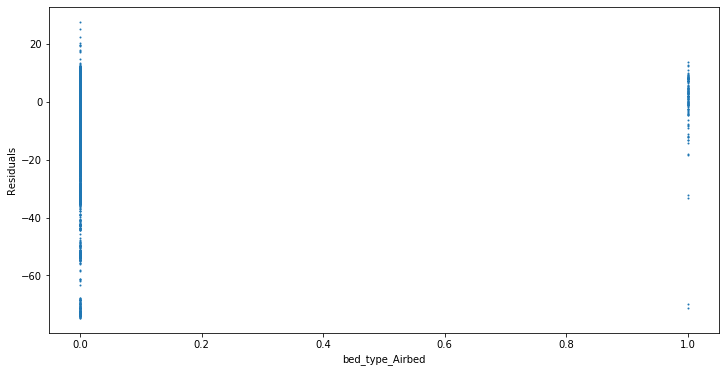

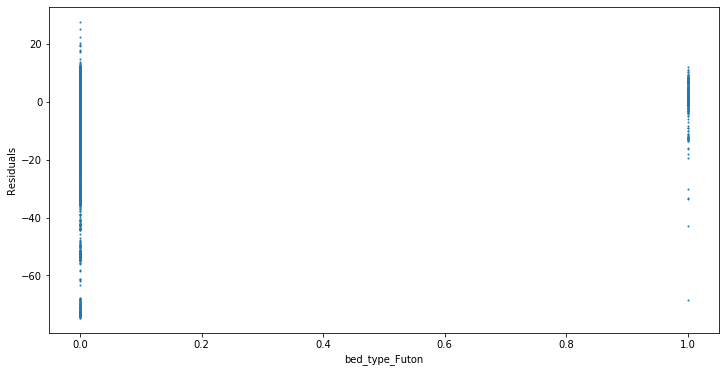

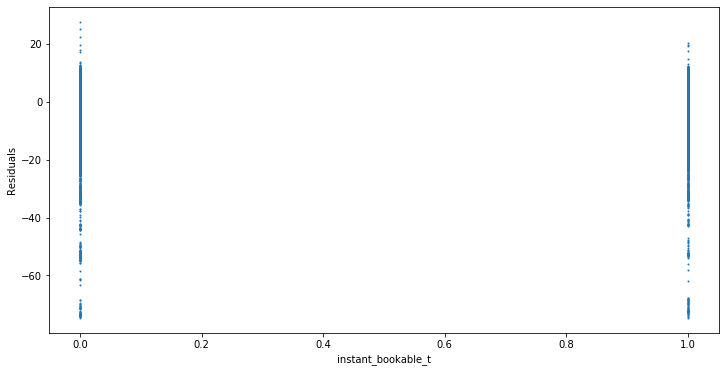

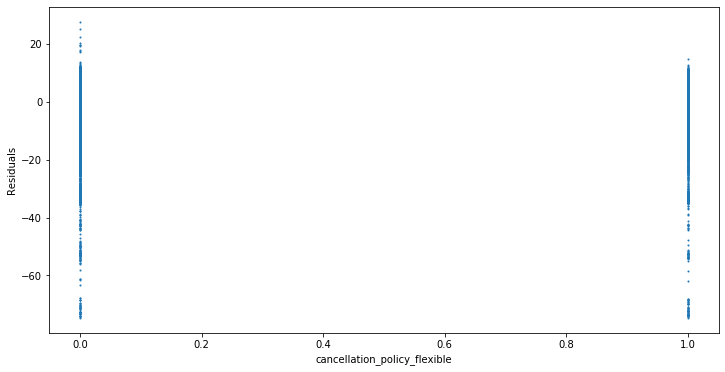

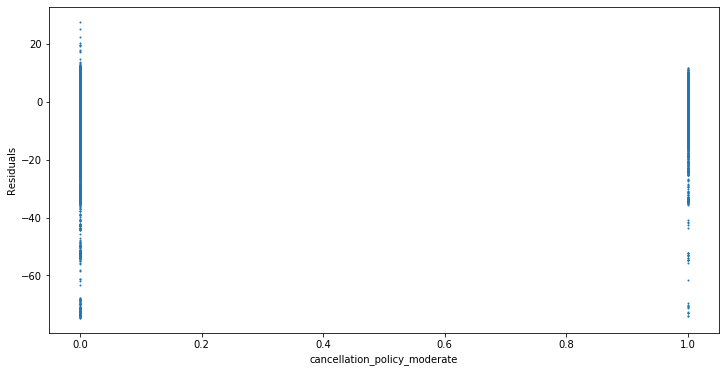

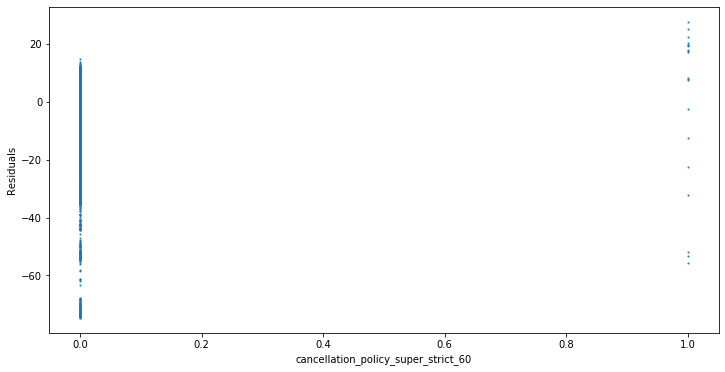

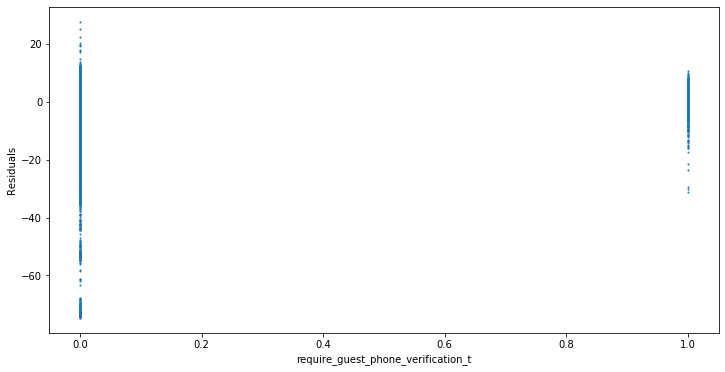

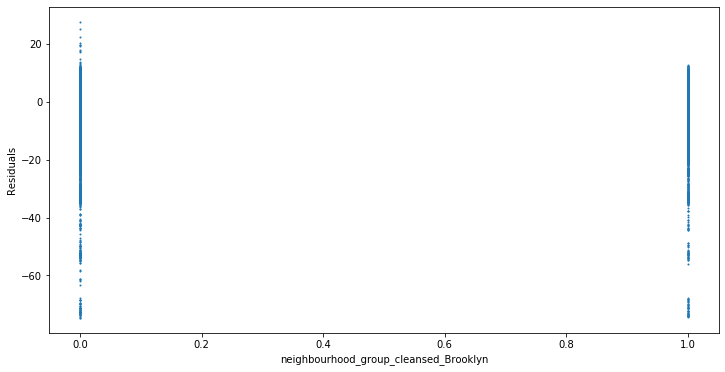

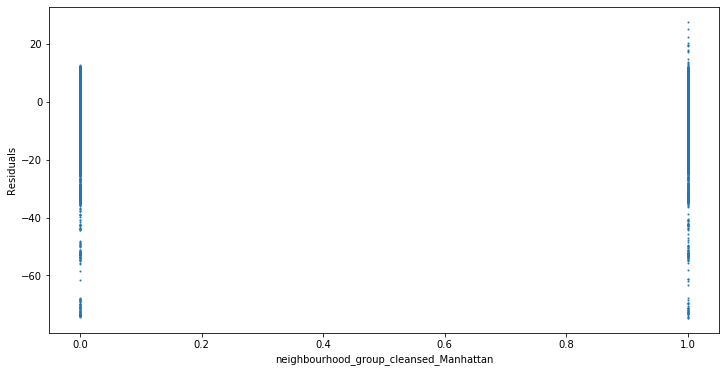

In [42]:
pred_val = fit2.fittedvalues.copy()
true_val = data_10['review_scores_rating'].values.copy()
residual = true_val - pred_val

for i in data_10.columns:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.scatter(data_10[i], residual, s=1)
    plt.xlabel('{}'.format(i))
    plt.ylabel('Residuals')
    plt.show()

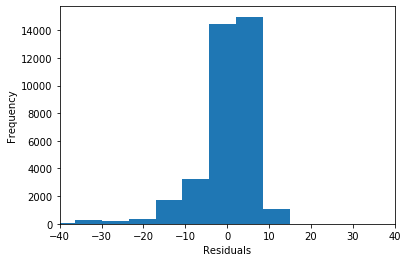

In [43]:
## data5_sr = (fit.resid / np.std(fit.resid)) 
#Histogram of residuals
ax = plt.hist(fit2.resid, 16)
plt.xlim(-40,40)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [44]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data_10, figsize=(20,20))

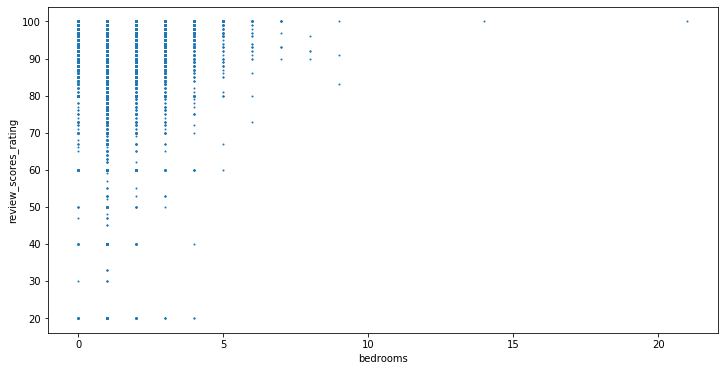

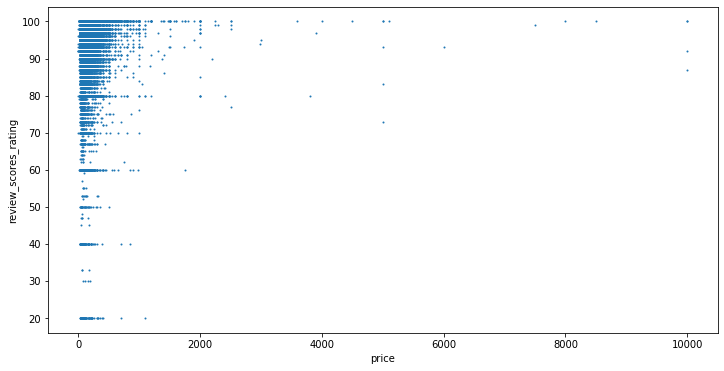

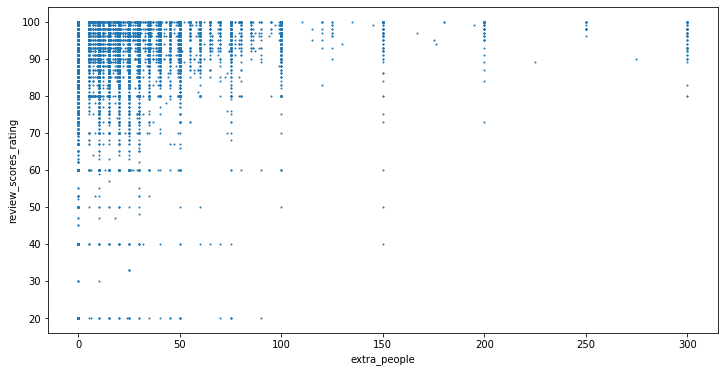

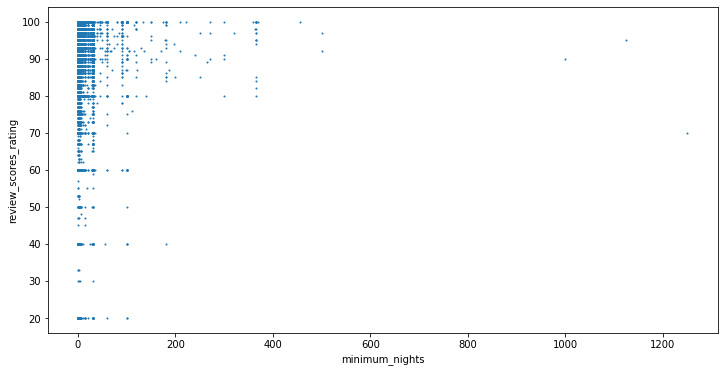

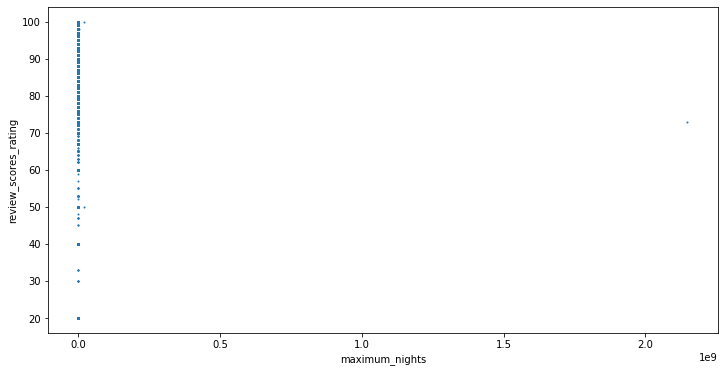

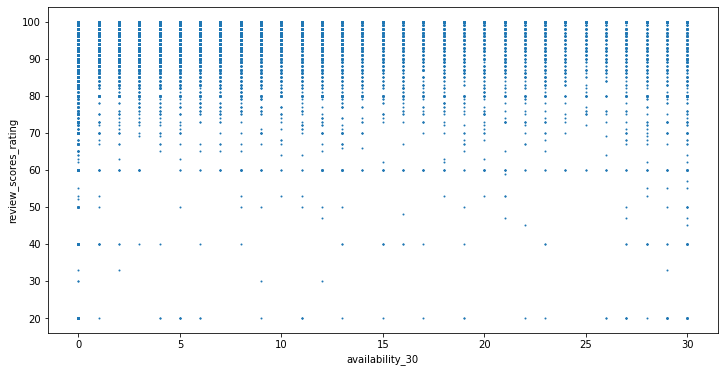

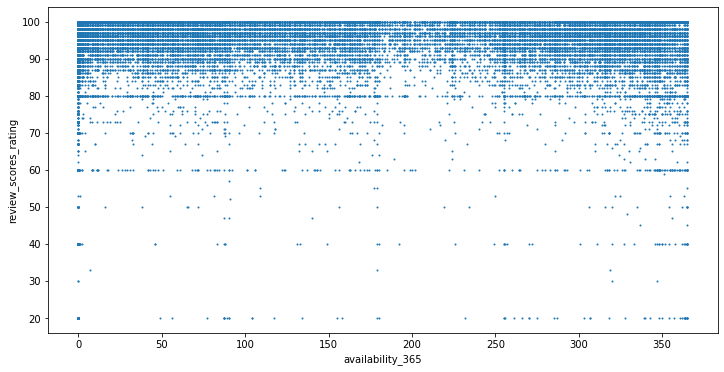

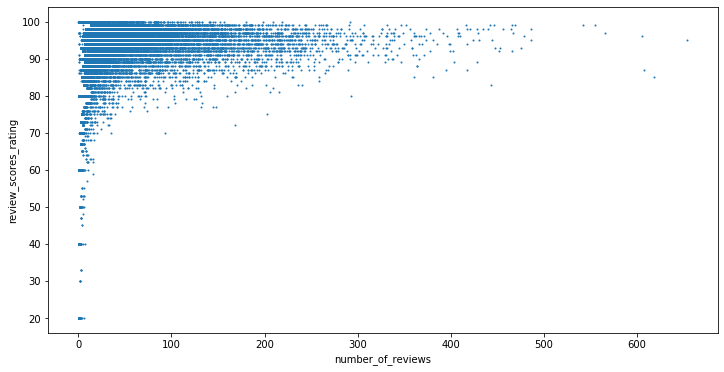

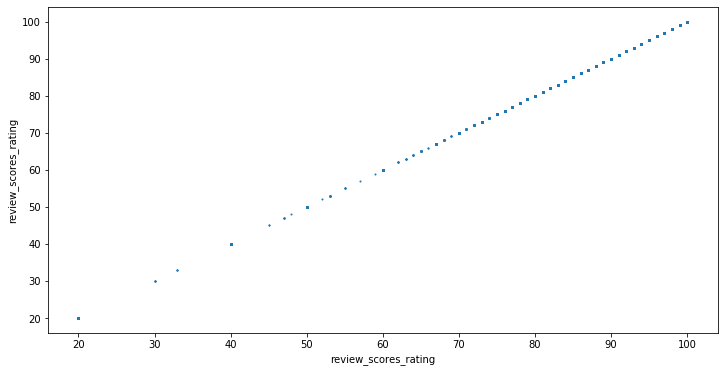

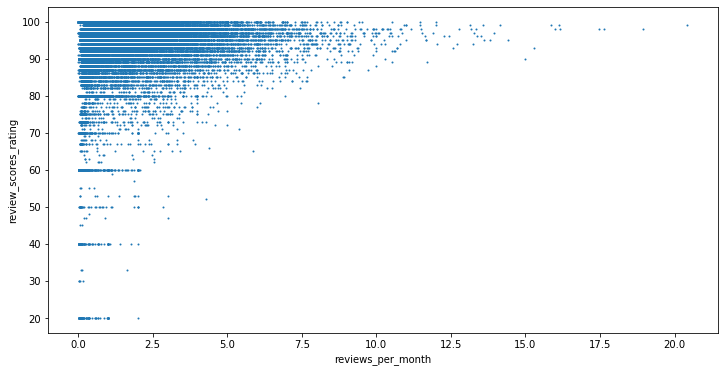

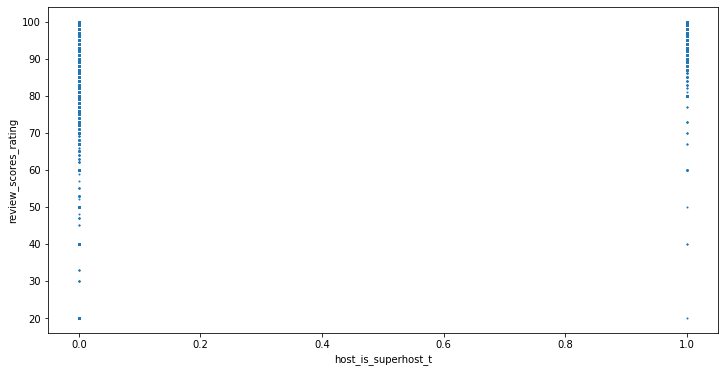

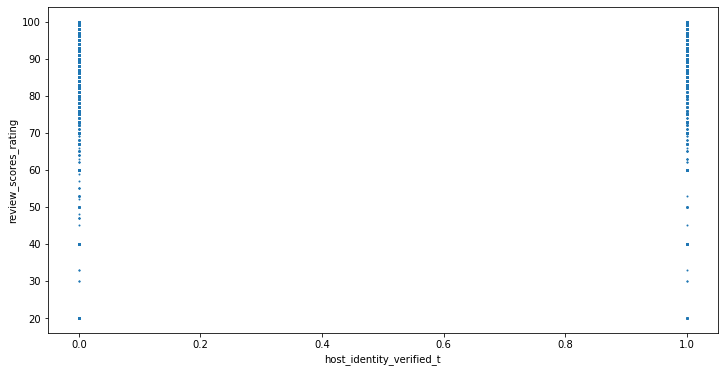

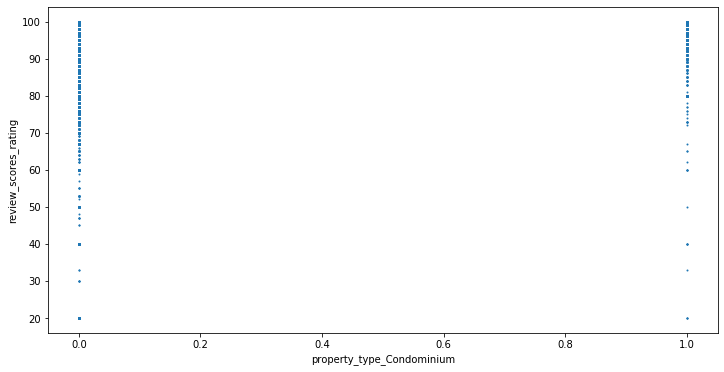

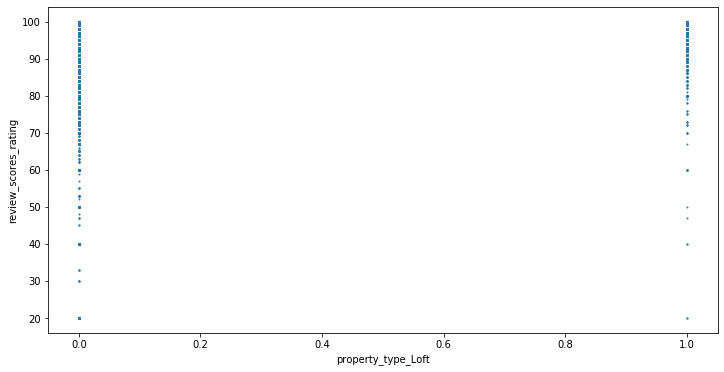

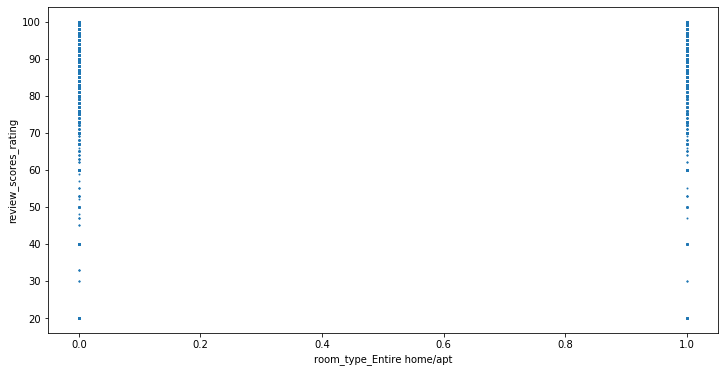

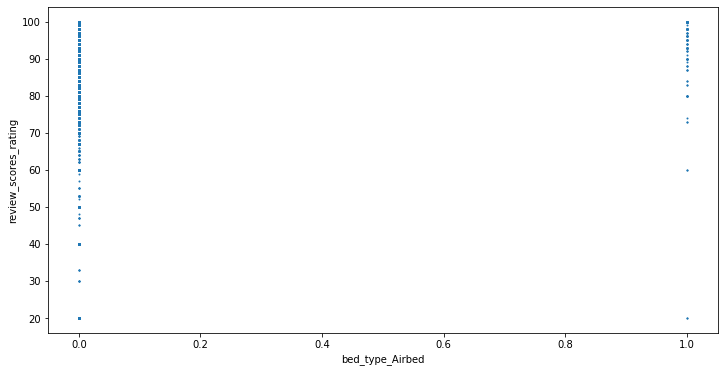

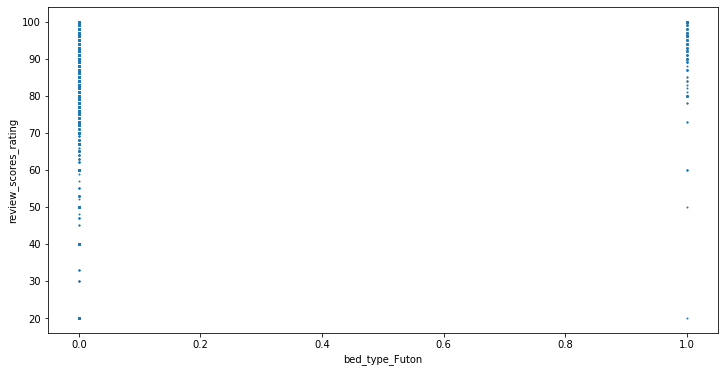

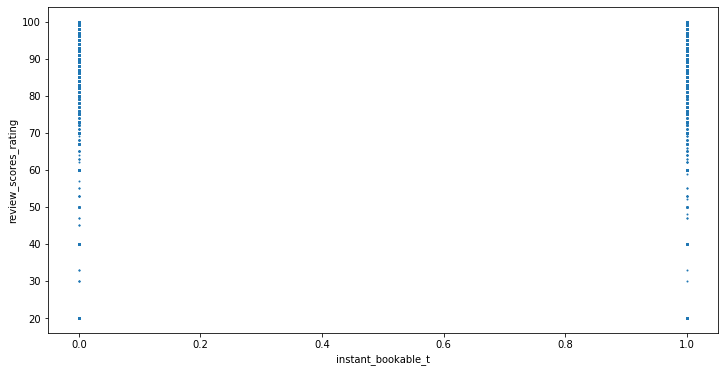

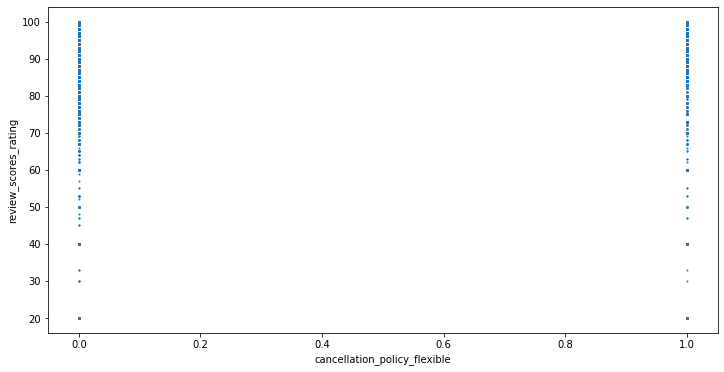

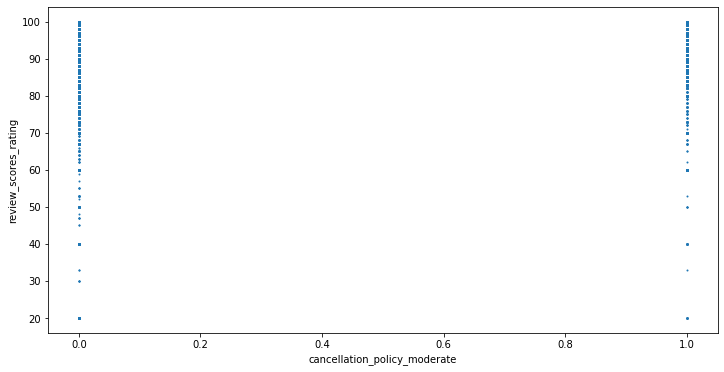

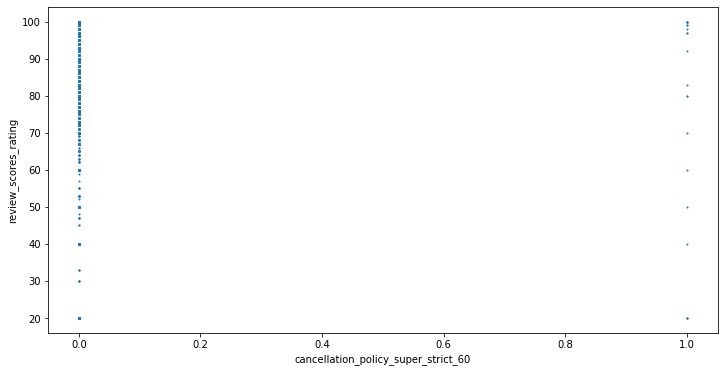

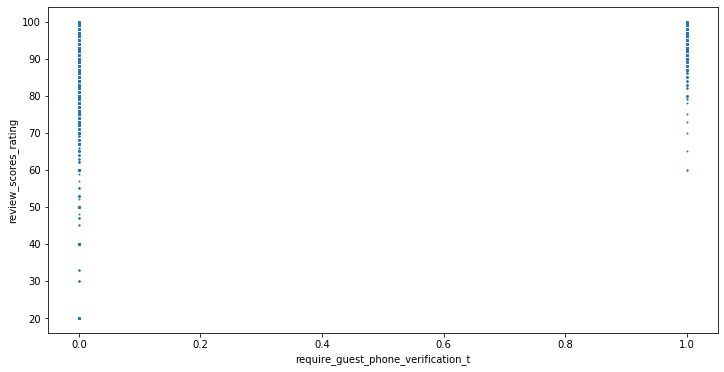

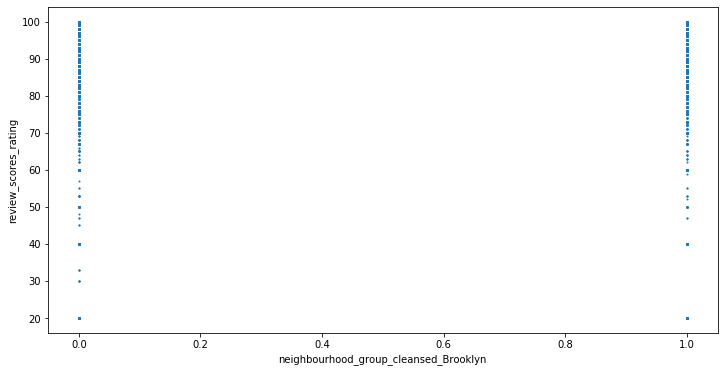

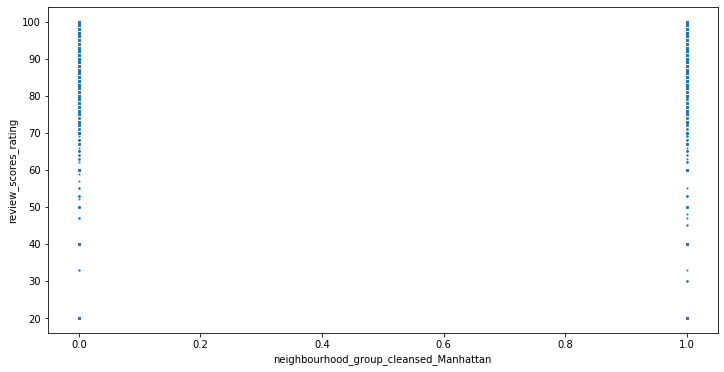

In [45]:
for i in data_10.columns:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.scatter(data_10[i], data_10['review_scores_rating'], s=1)
    plt.xlabel('{}'.format(i))
    plt.ylabel('review_scores_rating')
    plt.show()

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

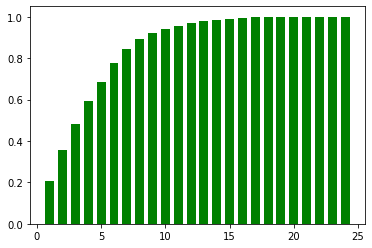

In [47]:
pca = PCA().fit(data_11)
var = pca.explained_variance_
y = np.cumsum(var)/np.sum(var)

plt.bar(np.arange(1,len(var)+1), y, color='green', width=0.7)
plt.show()

In [51]:
pca = PCA(n_components=10)
pca_x = pd.DataFrame(pca.fit_transform(data_11))
pca_x.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']
salary = data_11['review_scores_rating']

data_pca = pd.concat([pca_x, salary], axis = 1)
data_pca.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'Salary']
print(data_pca)

            pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -0.771343 -0.789147 -0.315802 -0.117746  0.101329 -0.012378 -0.119018   
1     -0.777309 -0.365967  0.485904 -0.192304 -0.528717 -0.681185  0.214080   
2      0.712866  0.269264 -0.217433  0.118567 -0.594551 -0.295013 -0.044341   
3     -0.676754  0.374387 -0.088715  0.395550 -0.658433  0.039079 -0.353617   
4     -0.561558 -0.127915 -1.078418  0.613047  0.090574 -0.029272  0.245597   
...         ...       ...       ...       ...       ...       ...       ...   
36543 -0.648251  1.213236 -0.388728  0.170166  0.131696  0.003143 -0.161730   
36544 -0.649062  1.199811 -0.398174  0.166744  0.147816 -0.021264 -0.116850   
36545 -0.169296  0.631484  0.492822 -0.668626  0.069447  0.209638 -0.748053   
36546  0.607787 -0.283787  0.575115 -0.472043 -0.622502 -0.580997 -0.040701   
36547  0.735695  1.126491 -0.438622 -0.115012  0.187746 -0.181632  0.031293   

            pc8       pc9      pc10  Salary  
0    

In [52]:
import matplotlib
%matplotlib inline
from sklearn.decomposition import PCA

In [54]:
model = sm.OLS.from_formula('Salary ~ pc1 + pc2 + pc3 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10', data=data_pca)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     327.5
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:05:28   Log-Likelihood:                 31451.
No. Observations:               36548   AIC:                        -6.288e+04
Df Residuals:                   36538   BIC:                        -6.280e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9241      0.001   1726.140      0.0